In [31]:
import pandas
import re

from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

url = 'data-pre-processing.csv'
dataframe = pandas.read_csv(url)

tokenizer = RegexpTokenizer("[\w']+")
stemmer = PorterStemmer()
vectorizer = TfidfVectorizer(stop_words='english')

corpus = []

# print("Removing contraction - replacer.replace")
# print("Removing special chars - re.sub") -> Pay attention to <br> </br> (ouseébrHEUehUE)
# print("Steeming words - steemer.stem")
for videoId,author,date,content,classification in dataframe.values:
    comment = []
    content = content.lower()
    content = re.sub('\<br\\\>', '', content)
    content = re.sub('(href.*)?http(.*)(\.com)?', 'HTTPWEBSITE', content)
    content = re.sub('[^A-Za-z0-9\s]+', '', content)
    for word in tokenizer.tokenize(content):
            word = stemmer.stem(word)
            comment.append(word)
    corpus.append(" ".join(comment))

print("Creating bag of words - vectorizer.fit_transform")
print()

vectorized =  vectorizer.fit_transform(corpus)

Creating bag of words - vectorizer.fit_transform
1956



Clusters: 2 - 0.04177 - done in 5.990s
Clusters: 3 - 0.07588 - done in 6.142s
Clusters: 4 - 0.08317 - done in 9.247s
Clusters: 5 - 0.08813 - done in 10.656s
Clusters: 6 - 0.09139 - done in 12.210s
Clusters: 7 - 0.09985 - done in 16.191s
Clusters: 8 - 0.10563 - done in 15.698s
Clusters: 9 - 0.10144 - done in 14.845s
Clusters: 10 - 0.10977 - done in 10.165s
Clusters: 11 - 0.10565 - done in 14.423s
Clusters: 12 - 0.10874 - done in 17.546s
Clusters: 13 - 0.11699 - done in 18.486s
Clusters: 14 - 0.11376 - done in 19.399s
Clusters: 15 - 0.12004 - done in 22.404s
Clusters: 16 - 0.12365 - done in 20.652s
Clusters: 17 - 0.12480 - done in 19.129s
Clusters: 18 - 0.12288 - done in 20.041s
Clusters: 19 - 0.12924 - done in 22.587s


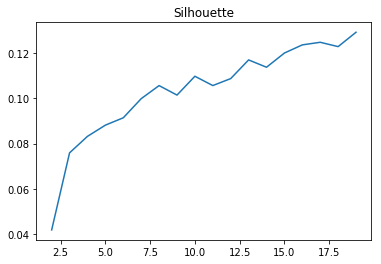

Top terms per cluster:
Cluster 0: httpwebsit love thi channel like subscrib video guy playlist perri
Cluster 1: billion eminem charli lost rihanna page adfli kld3i beat adam
Cluster 2: good make moneygqcom zonepacom doe work check money home onlin
Cluster 3: like thi comment song pleas video subscrib httpwebsit reason peopl
Cluster 4: br waka wow youtubebr check thi video subscrib playlist shakira
Cluster 5: thi song check video awesom httpwebsit parti just new love
Cluster 6: channel pleas check music thank video hey just guy cover
Cluster 7: youtub video check thi look br httpwebsit channel love like
Cluster 8: best song world cup eminem lmfao time music old katti
Cluster 9: subscrib channel pleas video come i39 thank like feed chanel
Cluster 10: shakira love best beauti wiredo ilov like perfect nice sexi
Cluster 11: love song thi eminem way lie make subscrib wanna danc
Cluster 12: view billion thi video million ha onli came check just
Cluster 13: playlist youtub check thi youtubea y

In [32]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
import matplotlib.pyplot as plt

silhouetteValues = []
maxK = 20


for k in range(2, maxK):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000, verbose=False)
    t0 = time()
    km.fit(vectorized.toarray())
    labels = km.labels_
    silhouette = metrics.silhouette_score(vectorized.toarray(), labels, metric='euclidean')
    silhouetteValues.append(silhouette)
    print("Clusters: %d - %0.5f - done in %0.3fs" % (k, silhouette, (time() - t0)))
    true_k = k

plt.title('Silhouette')
plt.plot(list(range(2,maxK)), silhouetteValues)

plt.show()

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

In [22]:
from time import time
from sklearn.cluster import AgglomerativeClustering

print("Compute structured hierarchical clustering...")

n_clusters = 10  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

t0 = time()
ward.fit(vectorized.toarray())
print("done in %0.3fs" % (time() - t0))

print()
print("Top terms per cluster:")
order_centroids = ward.children_
terms = vectorizer.get_feature_names()
print(ward.children_)
print(ward.labels_ )
for i in range(n_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i]:
        print(' %s' % terms[ind], end='')
    print()

Compute structured hierarchical clustering...
done in 8.970s

Top terms per cluster:
[[ 134  159]
 [ 585 1956]
 [ 825 1957]
 ..., 
 [2107 3801]
 [3882 3907]
 [3908 3909]]
[0 0 0 ..., 0 8 8]
Cluster 0: 500 753
Cluster 1: chack life
Cluster 2: datpiffcommixtapesdetailphpid633807 life39
Cluster 3: dispos lift
Cluster 4: frigea light
Cluster 5: hate lik
Cluster 6: hrefhttpssoundcloudcomroccsteadywaveemojiprodbynippylongbottomcyberpunkhttpssoundcloudcomroccsteadywaveemojiprodbynippylongbottomcyberpunka like
Cluster 7: httpminhatecacombrmaurosp2013filmesseriesdesenhosanimesmp3etc likeamp
Cluster 8: httpshhortcomaroocnjqu2b likebr
Cluster 9: jaylan likecom
